In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('commentary.csv')
print(df.head())

   over_number                                               comm  score  \
0         19.6  Chris Morris to Axar, 1 run, widish yorker out...  172.0   
1         19.5  Chris Morris to Bhuvneshwar, 3 runs, full toss...  171.0   
2         19.4  Chris Morris to Karthik, <b>out</b> Lbw!! Kart...  168.0   
3         19.4  Chris Morris to Karthik, <b>wide</b>, another ...  168.0   
4         19.3  Chris Morris to Karthik, <b>FOUR</b>, low full...  167.0   

                                               match  year  \
0  rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...  2018   
1  rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...  2018   
2  rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...  2018   
3  rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...  2018   
4  rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...  2018   

                batsman_bowler         bowler       batsman  innings_no  runs  \
0         Chris Morris to Axar  Chris Morris           Axar           1   1.0   
1  Chris

In [6]:
batting_df=df[df['batting_team']=='ind']
num = len(batting_df['match'].unique())
print("Total no. of matches India played:",num)

Total no. of matches India played: 28


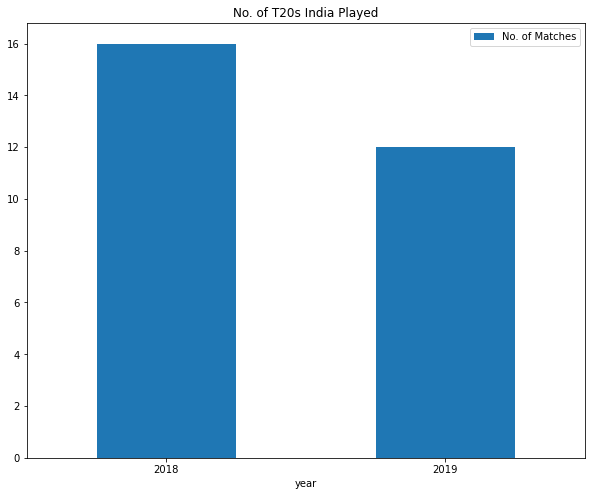

In [7]:
num_of_matches=batting_df.groupby(['year']).apply(lambda x:x['match'].nunique()).reset_index(name='No. of Matches')
fig = num_of_matches.plot.bar(x="year", y="No. of Matches", rot=0, title="No. of T20s India Played",figsize=(10,8)).get_figure()

In [8]:
score = batting_df.groupby(['year','match','innings_no']).apply(lambda x:x['runs'].sum()).reset_index(name='score')
print("Batting First Average score:",np.median(score[score['innings_no']==1]['score'].values))
print("Batting Second Average score:",np.median(score[score['innings_no']==2]['score'].values))

Batting First Average score: 183.0
Batting Second Average score: 157.5


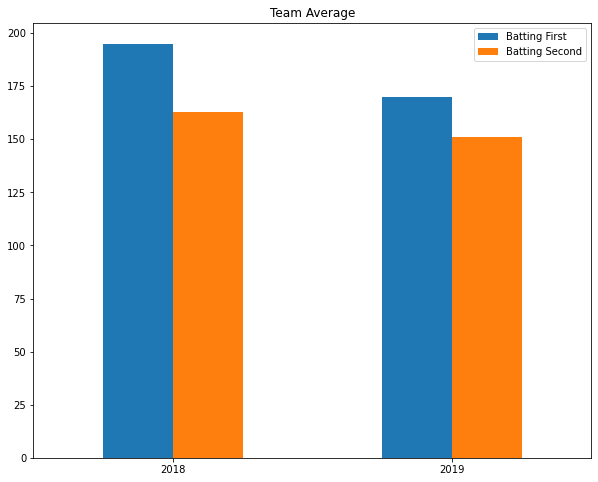

In [9]:
#split into innings
first_innings_df=score[score['innings_no']==1]
second_innings_df=score[score['innings_no']==2]

df1=first_innings_df.groupby('year').apply(lambda x:np.median(x['score'].values)).reset_index(name='score')
df2=second_innings_df.groupby('year').apply(lambda x:np.median(x['score'].values)).reset_index(name='score')

data = {"Batting First": df1['score'].values,
"Batting Second":df2['score'].values
}
index = df1['year'].values

# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
fig= dataFrame.plot.bar(rot=0, title="Team Average",figsize=(10,8)).get_figure()

In [10]:
grp = batting_df.groupby('match').first().reset_index()
matches_won = grp[grp['innings_no'] == grp['result']]
print("Over all Winning %:",(matches_won.shape[0]/num)*100)

#Batting first & second
first  = grp[grp['innings_no'] == 1]
second = grp[grp['innings_no'] == 2]

#Batting first winning %
won1 = first[first['innings_no'] == first['result']]
print("Batting First Winning % :",(won1.shape[0]/first.shape[0])*100)

#Batting secong winning %
won2 = second[second['innings_no'] == second['result']]
print("Batting Second Winning % :",(won2.shape[0]/second.shape[0])*100)

Over all Winning %: 67.85714285714286
Batting First Winning % : 50.0
Batting Second Winning % : 85.71428571428571


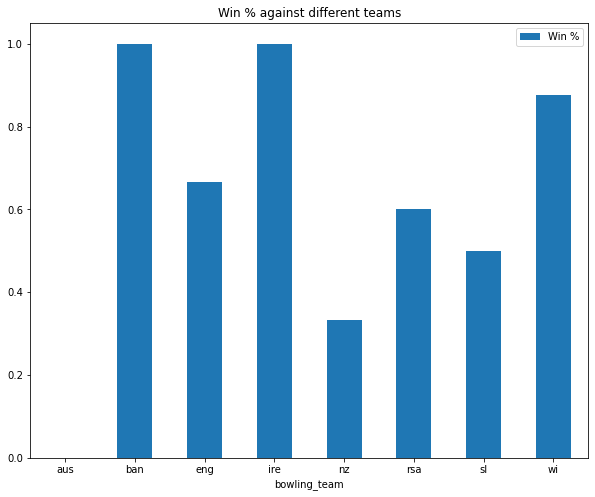

In [11]:
df1 = grp.groupby('bowling_team').apply(lambda x:x.shape[0]).reset_index(name='no')
df2=grp.groupby('bowling_team').apply(lambda x: x[x['innings_no']==x['result']].shape[0]).reset_index(name='won')
df2['Win %']=df2['won']/df1['no']
fig=df2.plot.bar(x="bowling_team", y="Win %", rot=0, title="Win % against different teams",figsize=(10,8)).get_figure() #weighted

In [13]:
batting_df=df[df['batting_team']=='ind']
bowling_df=df[df['bowling_team']=='ind']

#strike rate of indian team
sr=(np.sum(batting_df['runs'].values)/batting_df.shape[0])*100
print("Strike rate of Indian team:",sr)

Strike rate of Indian team: 141.7989417989418


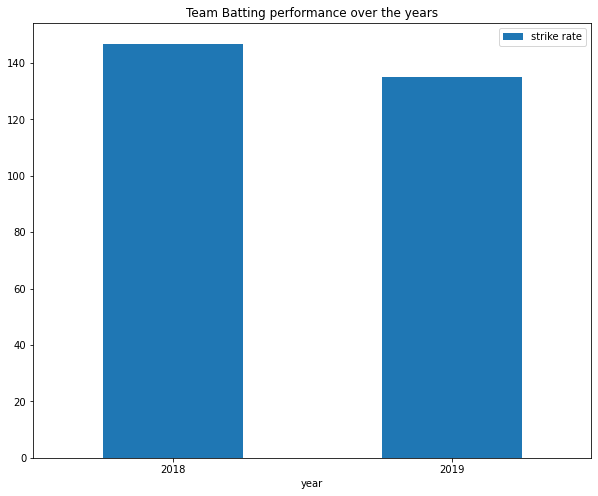

In [14]:
sr=batting_df.groupby('year').apply( lambda x: (np.sum(x['runs'].values)/x.shape[0])*100  ).reset_index(name='strike rate')
fig=sr.plot.bar(x="year", y="strike rate", rot=0, title="Team Batting performance over the years",figsize=(10,8)).get_figure()

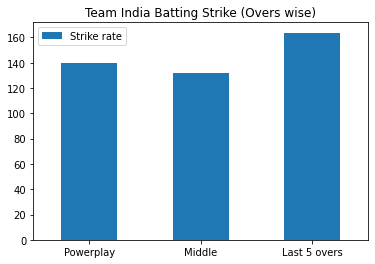

In [15]:
powerplay_df = df[df['over_number']<=5.6]
middle_df = df[(df['over_number']>=6.1) & (df['over_number']<=14.6)]
last_df = df[(df['over_number']>=15.1) & (df['over_number']<=19.6)]

powerplay_batting_df = powerplay_df[powerplay_df['batting_team']=='ind']
middle_batting_df = middle_df[middle_df['batting_team']=='ind']
last_batting_df = last_df[last_df['batting_team']=='ind']

sr1=(np.sum(powerplay_batting_df['runs'].values)/powerplay_batting_df.shape[0])*100
sr2=(np.sum(middle_batting_df['runs'].values)/middle_batting_df.shape[0])*100
sr3=(np.sum(last_batting_df['runs'].values)/last_batting_df.shape[0])*100

#plot
data = {"Strike rate":[sr1,sr2,sr3]
        };

index  = ["Powerplay", "Middle", "Last 5 overs"];

# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
axes = dataFrame.plot.bar(rot=0, title="Team India Batting Strike (Overs wise)").get_figure()

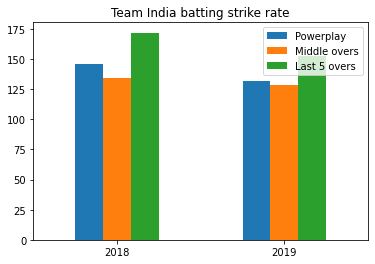

In [16]:
#Strike rate 
score = powerplay_batting_df.groupby(['year','match']).apply(lambda x:x['runs'].sum()).reset_index(name='score') 
pp=powerplay_batting_df.groupby("year").apply(lambda x:(x['runs'].sum()/x.shape[0])*100).reset_index(name='strike rate')
middle=middle_batting_df.groupby("year").apply(lambda x:(x['runs'].sum()/x.shape[0])*100).reset_index(name='strike rate') 
last=last_batting_df.groupby("year").apply(lambda x:(x['runs'].sum()/x.shape[0])*100).reset_index(name='strike rate')

data = {"Powerplay":pp['strike rate'].values,
        "Middle overs":middle['strike rate'].values,
        "Last 5 overs":last['strike rate'].values
        };

index  = last['year'].values
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
axes = dataFrame.plot.bar(rot=0, title="Team India batting strike rate")
#axes[1].legend(loc=2)  

fig=axes.get_figure()

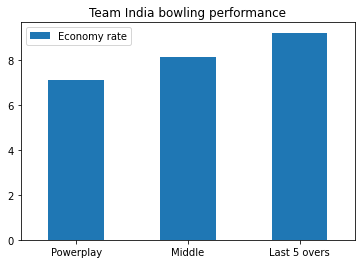

In [17]:
powerplay_bowling_df = powerplay_df[powerplay_df['bowling_team']=='ind']
middle_bowling_df = middle_df[middle_df['bowling_team']=='ind']
last_bowling_df = last_df[last_df['bowling_team']=='ind']

temp = powerplay_bowling_df.groupby('match').apply(lambda x:x['runs'].sum()).reset_index()
avg1=np.median(temp[0].values)
er1 = avg1/6.0

temp = middle_bowling_df.groupby('match').apply(lambda x:x['runs'].sum()).reset_index()
avg2=np.median(temp[0].values)
er2 = avg2/9.0

temp = last_bowling_df.groupby('match').apply(lambda x:x['runs'].sum()).reset_index()
avg3=np.median(temp[0].values)
er3 = avg3/5.0

data = {"Economy rate":[er1,er2,er3] };
index = ["Powerplay", "Middle", "Last 5 overs"];

# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
fig = dataFrame.plot.bar(rot=0, title="Team India bowling performance").get_figure()

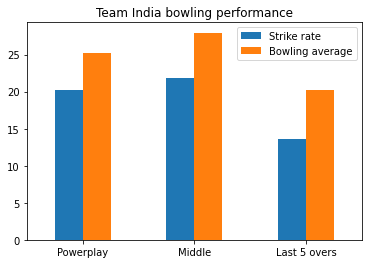

In [18]:
#bowling strike rate
sr1 = powerplay_bowling_df.shape[0]/(powerplay_bowling_df[powerplay_bowling_df['event']=='out'].shape[0])
sr2 = middle_bowling_df.shape[0]/(middle_bowling_df[middle_bowling_df['event']=='out'].shape[0])
sr3 = last_bowling_df.shape[0]/(last_bowling_df[last_bowling_df['event']=='out'].shape[0])

#bowling average
avg1=np.sum(powerplay_bowling_df['runs'].values)/(powerplay_bowling_df[powerplay_bowling_df['event']=='out'].shape[0])
avg2=np.sum(middle_bowling_df['runs'].values)/(middle_bowling_df[middle_bowling_df['event']=='out'].shape[0])
avg3=np.sum(last_bowling_df['runs'].values)/(last_bowling_df[last_bowling_df['event']=='out'].shape[0])

# A python dictionary
data = {"Strike rate":[sr1,sr2,sr3],
"Bowling average":[avg1,avg2,avg3]
}
index = ["Powerplay", "Middle", "Last 5 overs"];

# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
fig = dataFrame.plot.bar(rot=0, title="Team India bowling performance").get_figure()

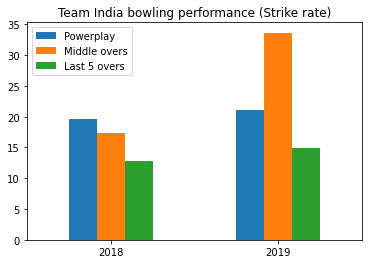

In [19]:
pp=powerplay_bowling_df.groupby('year').apply(lambda x: x.shape[0] / x[x['event']=='out'].shape[0] ).reset_index(name='strike rate')
middle=middle_bowling_df.groupby('year').apply(lambda x: x.shape[0] / x[x['event']=='out'].shape[0] ).reset_index(name='strike rate')
last=last_bowling_df.groupby('year').apply(lambda x: x.shape[0] / x[x['event']=='out'].shape[0] ).reset_index(name='strike rate')

# A python dictionary
data = {"Powerplay":pp['strike rate'].values,
"Middle overs":middle['strike rate'].values,
"Last 5 overs":last['strike rate'].values
}
index = last['year'].values
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
fig = dataFrame.plot.bar(rot=0, title="Team India bowling performance (Strike rate)").get_figure()

In [20]:
print("Avg no. of balls to hit 4:",batting_df.shape[0]/batting_df['runs'].value_counts()[4])
print("Avg no. of balls to hit 6:",batting_df.shape[0]/batting_df['runs'].value_counts()[6])

Avg no. of balls to hit 4: 9.120643431635388
Avg no. of balls to hit 6: 16.84158415841584


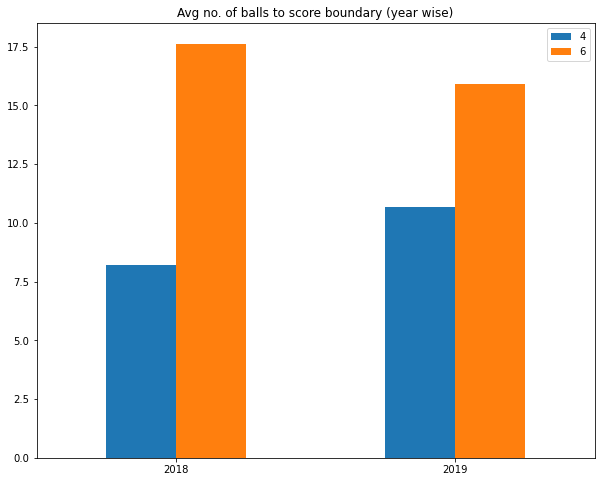

In [21]:
df_4 = batting_df.groupby('year').apply(lambda x: x.shape[0] / x[x['runs']==4].shape[0] ).reset_index(name='num_of_balls')
df_6 = batting_df.groupby('year').apply(lambda x: x.shape[0] / x[x['runs']==6].shape[0] ).reset_index(name='num_of_balls')

# A python dictionary
data = {"4":df_4['num_of_balls'].values,
"6":df_6['num_of_balls'].values
}

index = df_4['year'].values
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
fig = dataFrame.plot.bar(rot=0, title="Avg no. of balls to score boundary (year wise)",figsize=(10,8)).get_figure()


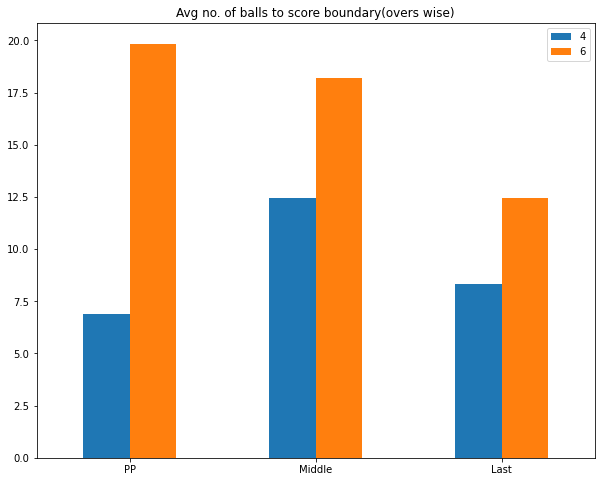

In [25]:
num1=powerplay_batting_df.shape[0]/powerplay_batting_df['runs'].value_counts()[4]
num2=middle_batting_df.shape[0]/middle_batting_df['runs'].value_counts()[4]
num3=last_batting_df.shape[0]/last_batting_df['runs'].value_counts()[4]

x_axis = ['PP','Middle','Last']
y_axis = [num1, num2, num3]
dataframe= pd.DataFrame({'overs':x_axis,'4':y_axis})

num1=powerplay_batting_df.shape[0]/powerplay_batting_df['runs'].value_counts()[6]
num2=middle_batting_df.shape[0]/middle_batting_df['runs'].value_counts()[6]
num3=last_batting_df.shape[0]/last_batting_df['runs'].value_counts()[6]
dataframe['6'] = [num1,num2,num3]

data = {"4":dataframe['4'].values,
"6":dataframe['6'].values
};

index = dataframe['overs'].values
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
fig = dataFrame.plot.bar(rot=0, title="Avg no. of balls to score boundary(overs wise)",figsize=(10,8)).get_figure()